####  Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max.columns",None)

In [2]:
loanData = pd.read_csv("loan.csv")


C:\Users\91983\AppData\Local\Temp\ipykernel_17372\3598964893.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loanData = pd.read_csv("loan.csv")


### Droping all the columns which has only null values and duplicate  rows

In [3]:
loanData = loanData.dropna(axis=1,how="all")

In [37]:
loanData = loanData.drop_duplicates()

In [38]:
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

#### looking for distinct loan status

In [5]:
loanData.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [6]:
loanData.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<Axes: >

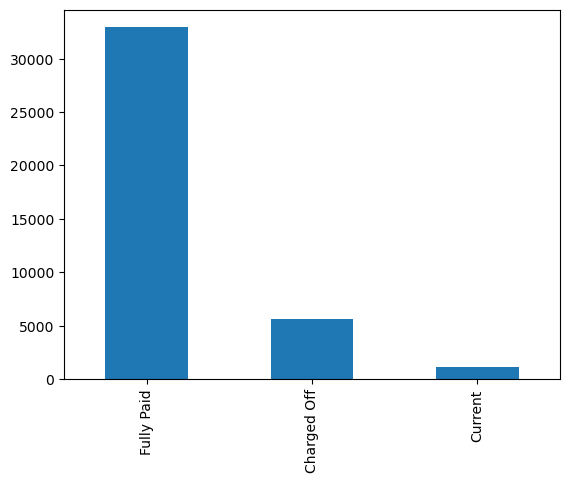

In [7]:
loanData.loan_status.value_counts().plot.bar()


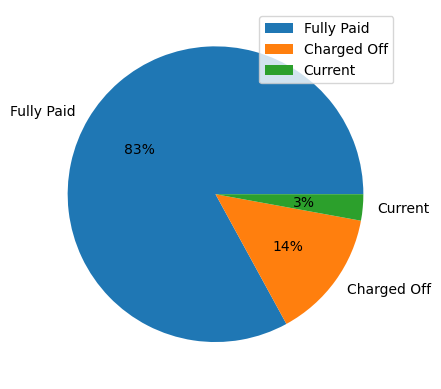

In [36]:
plt.pie(loanData.loan_status.value_counts(),labels=loanData.loan_status.value_counts().keys() ,autopct='%.0f%%')
plt.legend()
plt.show()

In [8]:
defaulterdata = loanData[loanData.loan_status == 'Charged Off']
fullyPaiddata = loanData[loanData.loan_status == 'Fully Paid']

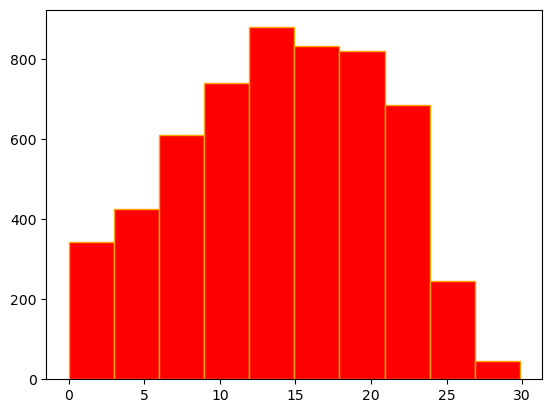

In [9]:
plt.hist(defaulterdata.dti,bins=10,edgecolor='Orange',color='red')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


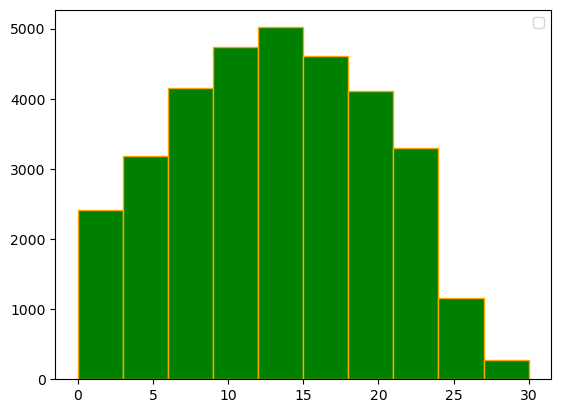

In [20]:
plt.hist(fullyPaiddata.dti,bins=10,edgecolor='Orange',color='green')
plt.legend()
plt.show()

In [13]:
defaulterdata.int_rate = defaulterdata.int_rate.apply(lambda x:x[:-1])

defaulterdata.int_rate = defaulterdata.int_rate.astype(float)

C:\Users\91983\AppData\Local\Temp\ipykernel_17372\930627585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulterdata.int_rate = defaulterdata.int_rate.apply(lambda x:x[:-1])
C:\Users\91983\AppData\Local\Temp\ipykernel_17372\930627585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulterdata.int_rate = defaulterdata.int_rate.astype(float)


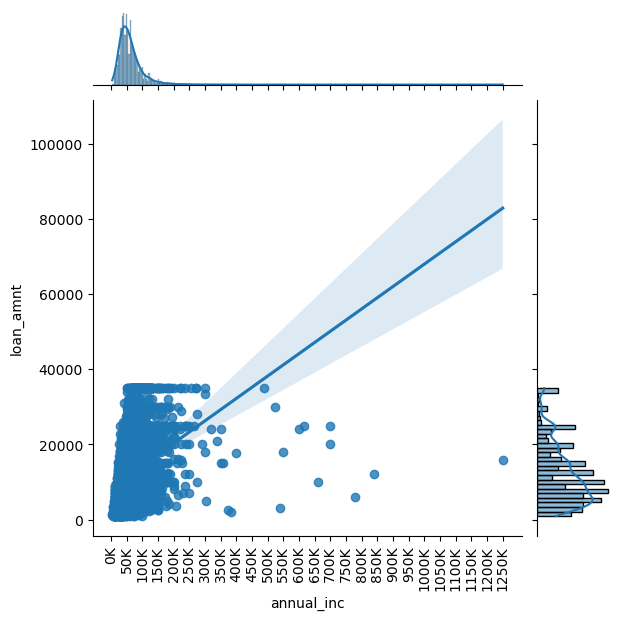

In [24]:

sns.jointplot(defaulterdata,x="annual_inc",y="loan_amnt",kind="reg")
ticks = np.arange(0,1300000,50000)
label = ["{}K".format(i // 1000) for i in ticks]
plt.xticks(ticks,label,rotation = 90)
plt.show()

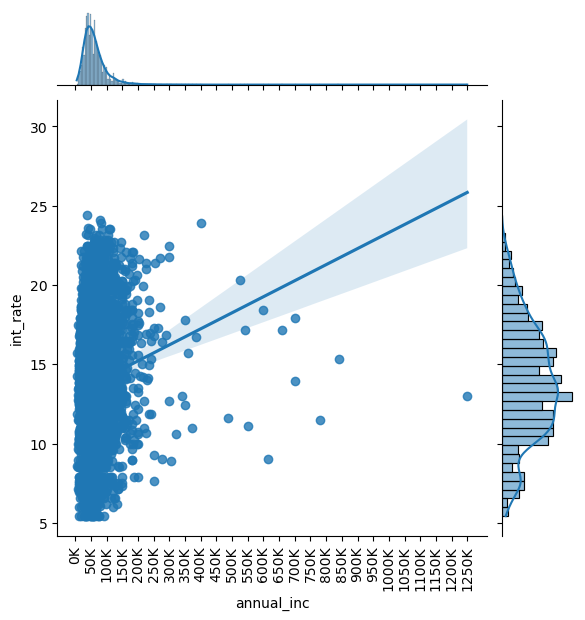

In [19]:
sns.jointplot(defaulterdata,x="annual_inc",y="int_rate",kind="reg")
ticks = np.arange(0,1300000,50000)
label = ["{}K".format(i // 1000) for i in ticks]
plt.xticks(ticks,label,rotation = 90)
plt.show()

In [75]:
loanData.annual_inc.isnull()

False

In [101]:
pd.pivot_table(data= loanData,values=['annual_inc','dti','loan_amnt','int_rate'],index=['loan_status'],aggfunc='mean')

,annual_inc,dti,int_rate,loan_amnt
loan_status,,,,
Charged Off,62427.298034,14.000624,13.820432,12104.385108
Current,75430.665105,14.750009,15.031465,17053.991228
Fully Paid,69862.503328,13.148421,11.609761,10866.455994


<Axes: >

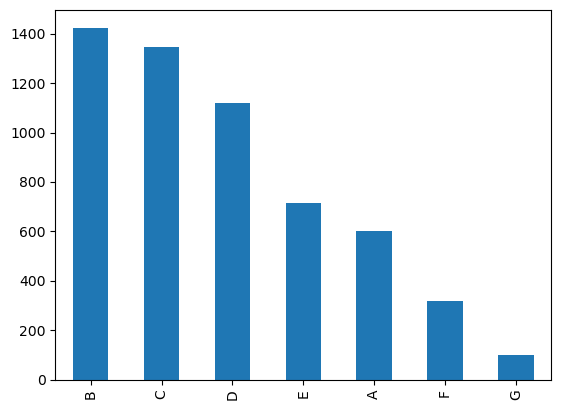

In [46]:
defaulterdata.grade.value_counts().plot.bar()

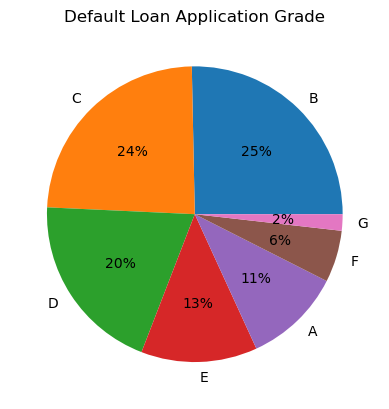

In [50]:
plt.pie(defaulterdata.grade.value_counts(),labels=defaulterdata.grade.value_counts().keys(),autopct='%.0f%%')
plt.title("Default Loan Application Grade")
plt.show()


In [44]:
 loanData.groupby("loan_status")["int_rate","annual_inc"].mean()

C:\Users\91983\AppData\Local\Temp\ipykernel_17372\2299005893.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loanData.groupby("loan_status")["int_rate","annual_inc"].mean()
C:\Users\91983\AppData\Local\Temp\ipykernel_17372\2299005893.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loanData.groupby("loan_status")["int_rate","annual_inc"].mean()


,annual_inc
loan_status,
Charged Off,62427.298034
Current,75430.665105
Fully Paid,69862.503328


<Axes: >

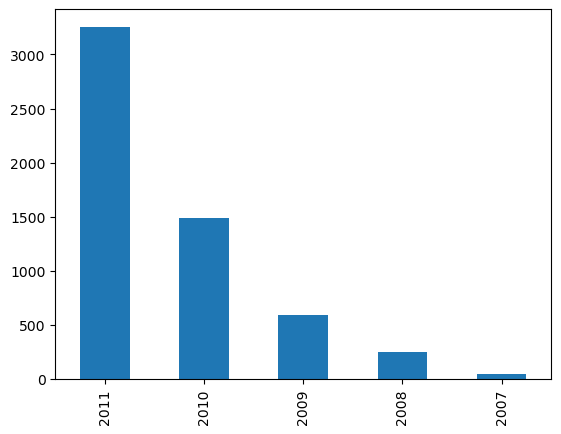

In [66]:
issue_date = defaulterdata.issue_d
issue_date = pd.to_datetime(issue_date,format="%b-%y")
yearWiseDeafulterLoans= pd.DatetimeIndex(issue_date).year.value_counts()
yearWiseDeafulterLoans.plot.bar()